# Graduate Rotational Internship Program (GRIP)
## The Sparks Foundation
### Name: Siddharth Sunil Tayde
### Task 6 : Prediction using Decision Tree Algorithm
Create the Decision Tree classifier and visualize it graphically.

Import Necessary Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Importing and reading the dataset

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Data cleaning

In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
df.shape

(150, 5)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

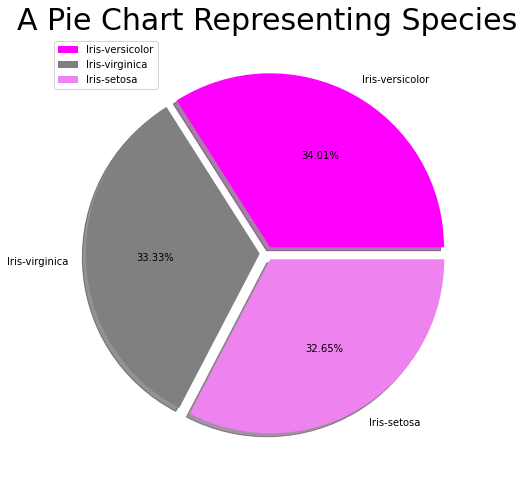

In [12]:
# plotting a pie chart
size = [50,49,48]
labels = "Iris-versicolor", "Iris-virginica","Iris-setosa"
colors = ['magenta', 'grey','violet']
explode = [0.04,0.04,0.04]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors,explode = explode,shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Species', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

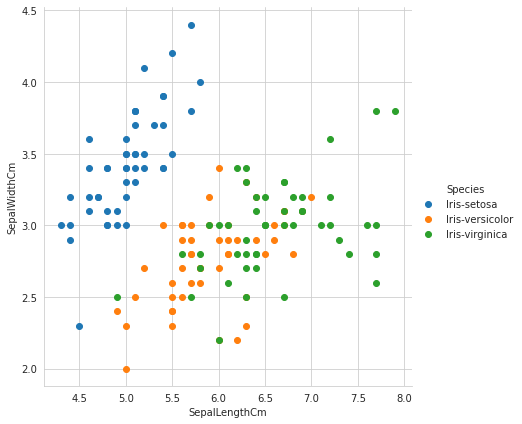

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

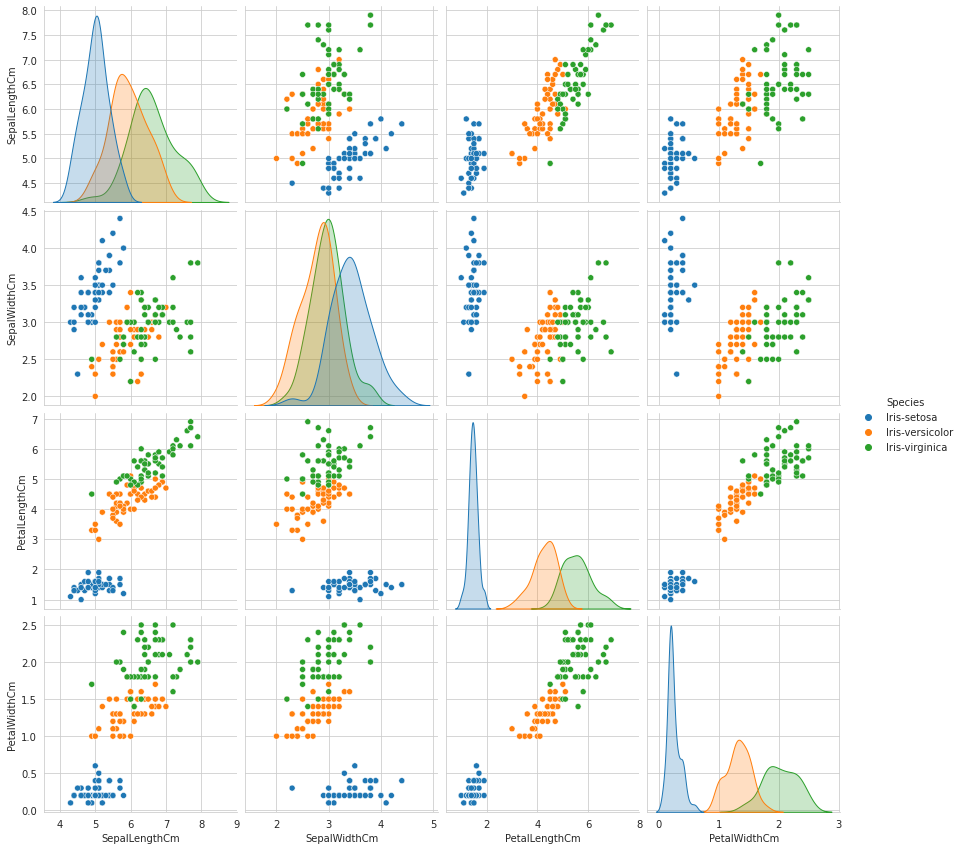

In [14]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species", size=3);
plt.show()

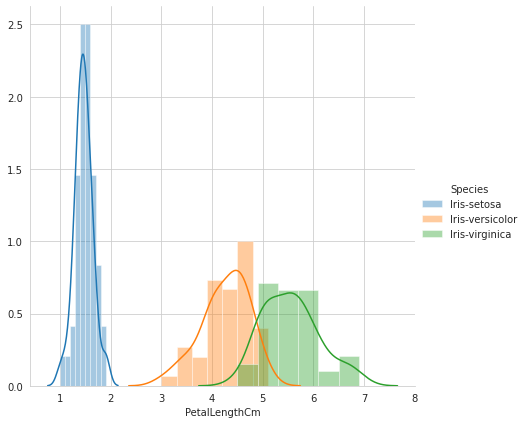

In [15]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend()
plt.show()

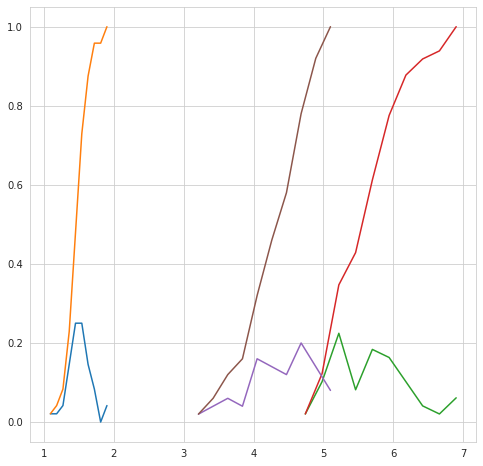

In [16]:
iris_setosa = df.loc[df["Species"] == "Iris-setosa"];
iris_virginica = df.loc[df["Species"] == "Iris-virginica"];
iris_versicolor = df.loc[df["Species"] == "Iris-versicolor"];

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

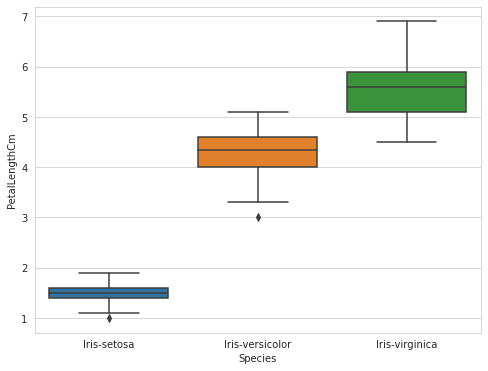

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Species',y='PetalLengthCm', data=df)
plt.show()

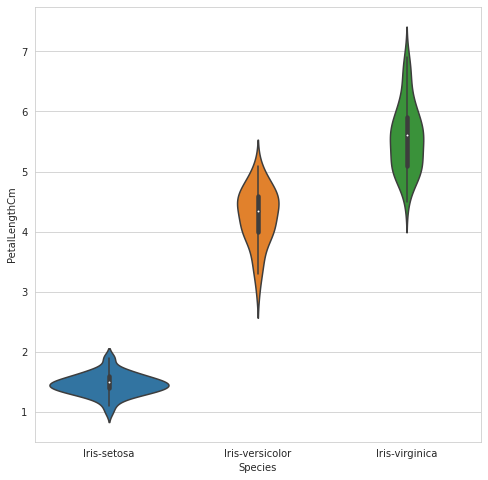

In [18]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=8)
plt.show()

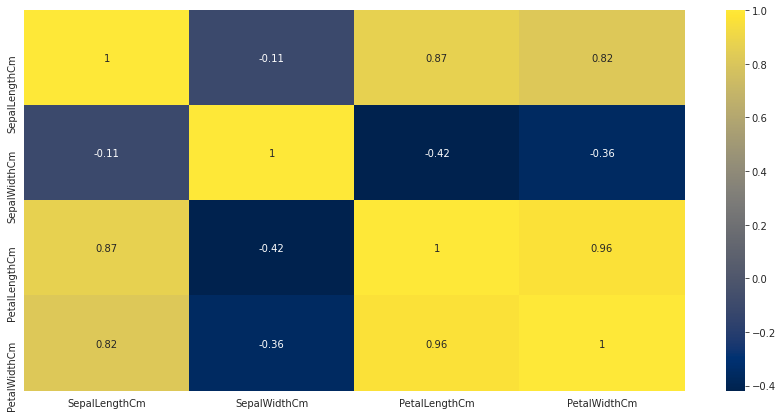

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='cividis')
plt.tight_layout()

In [20]:
x= df.drop('Species',axis=1)
y= df['Species']

Model Traning

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train,y_train)

In [23]:
features = x.columns.tolist()
target = y.value_counts().index

Decision Tree Visualization

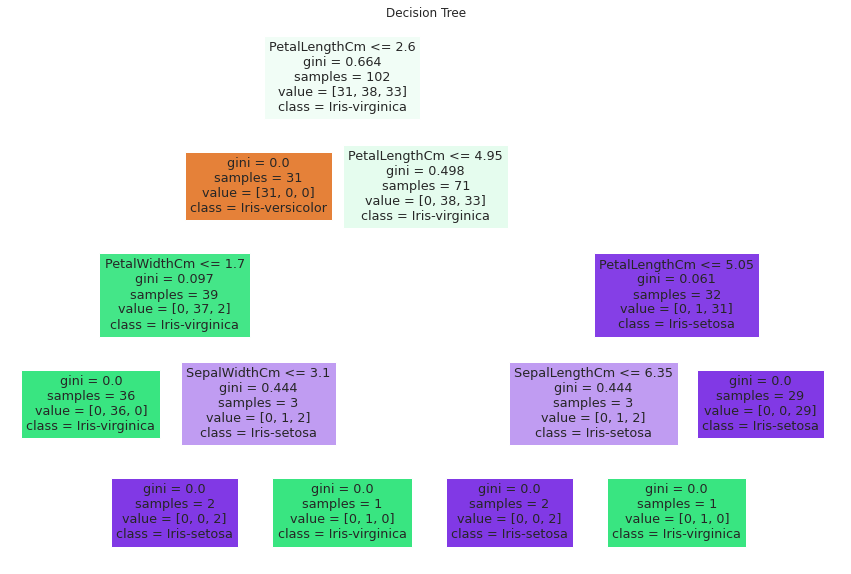

In [24]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(model,feature_names=features,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree")
plt.show()